In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv',low_memory=False)
print(df.shape)

(121605, 19)


In [ ]:
df.columns

Index(['category', 'close_date', 'currency', 'funds_raised_amount',
       'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'open_date',
       'product_stage', 'project_type', 'tags', 'is_proven', 'is_promoted',
       'duration_days', 'launch_month', 'launch_quarter', 'launch_year',
       'is_successful', 'funding_goal_category'],
      dtype='object')

DROP FEATURES THAT ARE KNOWN AFTER THE CAMPAIGN LAUNCHES

In [ ]:
df = df.drop(columns=['funds_raised_amount', 'funds_raised_percent', 'open_date', 'close_date'])


In [ ]:
df.rename(columns={'funding_goal_category': 'goal'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121605 entries, 0 to 121604
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   category        121605 non-null  object
 1   currency        121605 non-null  object
 2   is_indemand     121605 non-null  bool  
 3   is_pre_launch   121605 non-null  bool  
 4   product_stage   121605 non-null  object
 5   project_type    121605 non-null  object
 6   tags            93097 non-null   object
 7   is_proven       121605 non-null  object
 8   is_promoted     121605 non-null  object
 9   duration_days   121605 non-null  int64 
 10  launch_month    121605 non-null  int64 
 11  launch_quarter  121605 non-null  int64 
 12  launch_year     121605 non-null  int64 
 13  is_successful   121605 non-null  int64 
 14  goal            121605 non-null  object
dtypes: bool(2), int64(5), object(8)
memory usage: 12.3+ MB


In [ ]:
df['tags'].fillna('unknown', inplace=True)


<ipython-input-7-ba7fd4c98094>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tags'].fillna('unknown', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121605 entries, 0 to 121604
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   category        121605 non-null  object
 1   currency        121605 non-null  object
 2   is_indemand     121605 non-null  bool  
 3   is_pre_launch   121605 non-null  bool  
 4   product_stage   121605 non-null  object
 5   project_type    121605 non-null  object
 6   tags            121605 non-null  object
 7   is_proven       121605 non-null  object
 8   is_promoted     121605 non-null  object
 9   duration_days   121605 non-null  int64 
 10  launch_month    121605 non-null  int64 
 11  launch_quarter  121605 non-null  int64 
 12  launch_year     121605 non-null  int64 
 13  is_successful   121605 non-null  int64 
 14  goal            121605 non-null  object
dtypes: bool(2), int64(5), object(8)
memory usage: 12.3+ MB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
selected_features = ['category', 'product_stage', 'project_type', 'duration_days', 'launch_month', 'launch_year', 'goal']
# Extract the features and target
X = df[selected_features]
y = df['is_successful']  # Assuming 'is_successful' is your target column

In [ ]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing
numeric_features = ['duration_days', 'launch_month', 'launch_year']  # Numeric features for scaling
categorical_features = ['category', 'product_stage', 'project_type', 'goal']  # Categorical features

# Apply transformations
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer to handle both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


🔍 Evaluating: Logistic Regression
✅ Accuracy: 0.9006

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     19884
           1       0.82      0.58      0.68      4437

    accuracy                           0.90     24321
   macro avg       0.87      0.78      0.81     24321
weighted avg       0.90      0.90      0.89     24321


🧮 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        19311          573
Actual 1         1844         2593


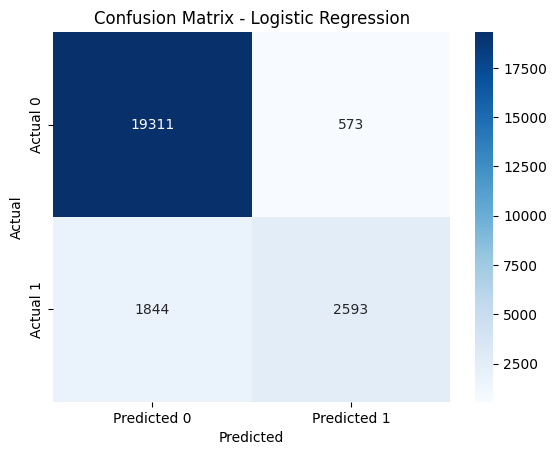

🔍 Evaluating: Random Forest
✅ Accuracy: 0.8896

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     19884
           1       0.74      0.61      0.67      4437

    accuracy                           0.89     24321
   macro avg       0.83      0.78      0.80     24321
weighted avg       0.88      0.89      0.89     24321


🧮 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18909          975
Actual 1         1711         2726


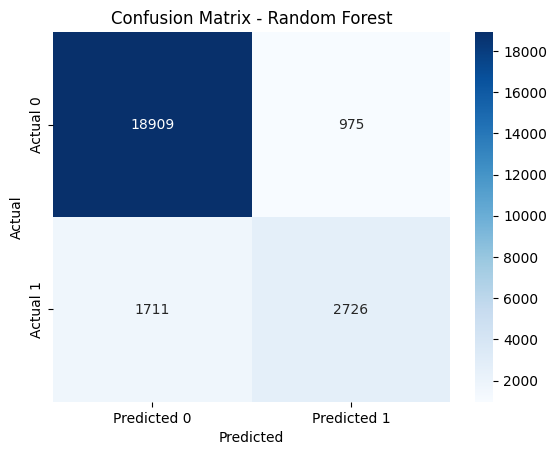

🔍 Evaluating: Decision Tree
✅ Accuracy: 0.8785

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     19884
           1       0.69      0.60      0.64      4437

    accuracy                           0.88     24321
   macro avg       0.80      0.77      0.78     24321
weighted avg       0.87      0.88      0.87     24321


🧮 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18718         1166
Actual 1         1789         2648


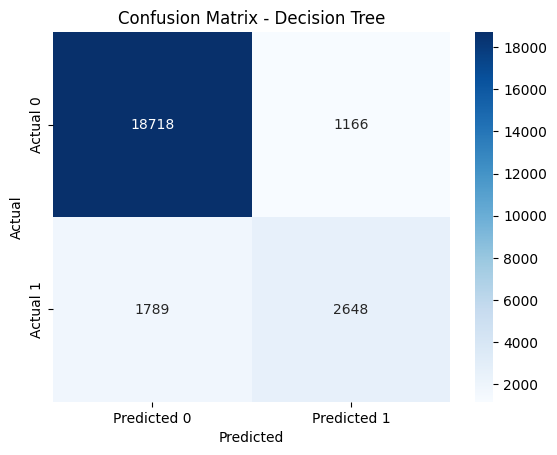

🔍 Evaluating: KNN
✅ Accuracy: 0.8911

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.93     19884
           1       0.75      0.60      0.67      4437

    accuracy                           0.89     24321
   macro avg       0.83      0.78      0.80     24321
weighted avg       0.89      0.89      0.89     24321


🧮 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18991          893
Actual 1         1755         2682


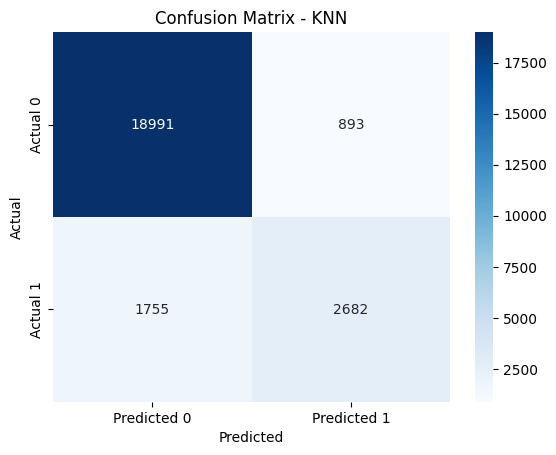

🔍 Evaluating: Gradient Boosting
✅ Accuracy: 0.9016

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     19884
           1       0.82      0.59      0.68      4437

    accuracy                           0.90     24321
   macro avg       0.87      0.78      0.81     24321
weighted avg       0.90      0.90      0.89     24321


🧮 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        19330          554
Actual 1         1840         2597


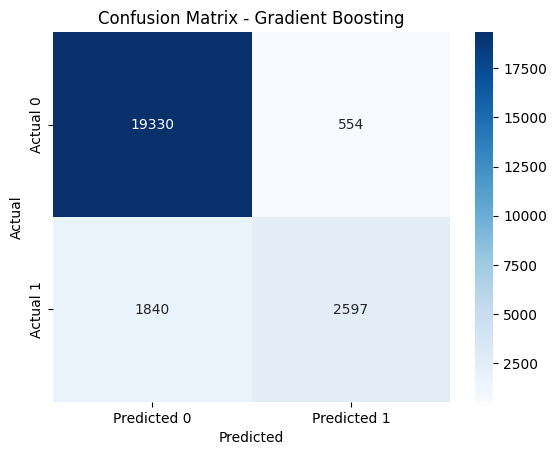

🔍 Evaluating: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:55:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.9005

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     19884
           1       0.81      0.59      0.68      4437

    accuracy                           0.90     24321
   macro avg       0.86      0.78      0.81     24321
weighted avg       0.90      0.90      0.89     24321


🧮 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        19279          605
Actual 1         1815         2622


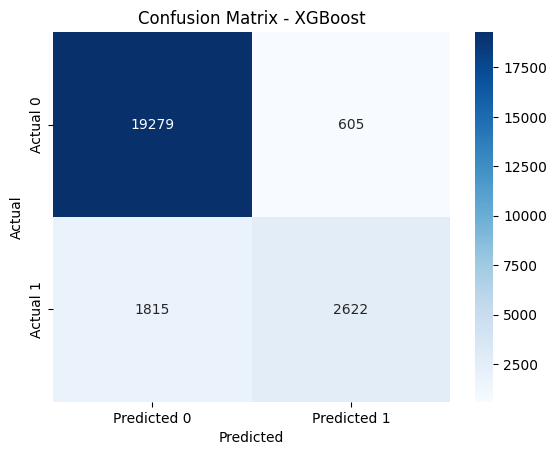

In [ ]:
# Step 4: Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Step 5: Loop through models
for name, model in models.items():
    print("="*60)
    print(f"🔍 Evaluating: {name}")

    # Create pipeline with preprocessing and classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Accuracy
    accuracy = pipeline.score(X_test, y_test)
    print(f"✅ Accuracy: {accuracy:.4f}")

    # Classification report
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    print("\n🧮 Confusion Matrix:")
    print(cm_df)

    # Optionally, plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


✅ Accuracy of Gradient Boosting: 0.9016

📊 Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     19884
           1       0.82      0.59      0.68      4437

    accuracy                           0.90     24321
   macro avg       0.87      0.78      0.81     24321
weighted avg       0.90      0.90      0.89     24321


🧮 Confusion Matrix for Gradient Boosting:
          Predicted 0  Predicted 1
Actual 0        19330          554
Actual 1         1840         2597


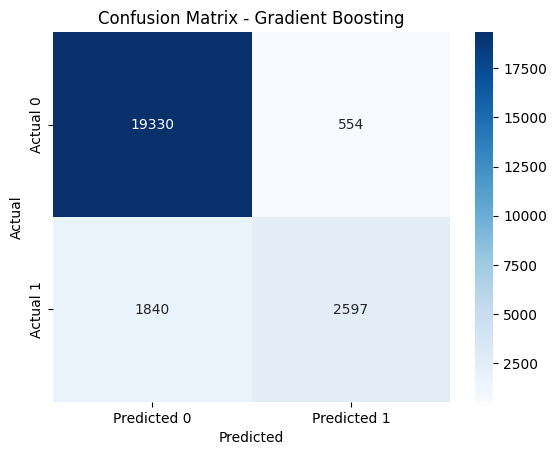

In [ ]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Create the pipeline again specifically for Gradient Boosting
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gb_model)
])

# Fit the model
pipeline_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = pipeline_gb.predict(X_test)

# Accuracy of Gradient Boosting model
accuracy_gb = pipeline_gb.score(X_test, y_test)
print(f"✅ Accuracy of Gradient Boosting: {accuracy_gb:.4f}")

# Classification report for Gradient Boosting
print("\n📊 Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_df_gb = pd.DataFrame(cm_gb, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\n🧮 Confusion Matrix for Gradient Boosting:")
print(cm_df_gb)

# Optionally, plot the confusion matrix
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [3],
    'classifier__min_samples_split': [2],
}

# GridSearchCV
grid_search = GridSearchCV(pipeline_gb, param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate on the test set using the best model
y_pred_gb_tuned = grid_search.best_estimator_.predict(X_test)
accuracy_gb_tuned = grid_search.best_estimator_.score(X_test, y_test)
print(f"Tuned Gradient Boosting Accuracy: {accuracy_gb_tuned:.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best score: 0.9007030960897989
Tuned Gradient Boosting Accuracy: 0.9016


In [ ]:
# Feature importance
feature_importances = pipeline_gb.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
cat_columns = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_columns)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                             Feature  Importance
0                      duration_days    0.369115
44                     goal_Very Low    0.159883
42                     goal_No Funds    0.118028
41                       goal_Medium    0.113702
40                          goal_Low    0.086884
43                    goal_Very High    0.073343
39                         goal_High    0.034846
7                    category_Comics    0.019842
2                        launch_year    0.008715
32     category_Writing & Publishing    0.004719
36            product_stage_shipping    0.001493
19         category_Local Businesses    0.001283
26           category_Tabletop Games    0.001250
34          product_stage_production    0.001221
14                     category_Film    0.001004
15         category_Food & Beverages    0.000813
20                    category_Music    0.000721
4                       category_Art    0.000611
3             category_Animal Rights    0.000512
1                   

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Gradient Boosting
cross_val_scores = cross_val_score(pipeline_gb, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV score: {cross_val_scores.mean():.4f}")


Cross-validation scores: [0.87401834 0.90099091 0.90785741 0.89157518 0.89798939]
Mean CV score: 0.8945


Accuracy: 0.9016

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        19330          554
Actual 1         1840         2597

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     19884
           1       0.82      0.59      0.68      4437

    accuracy                           0.90     24321
   macro avg       0.87      0.78      0.81     24321
weighted avg       0.90      0.90      0.89     24321


ROC-AUC Score: 0.9376


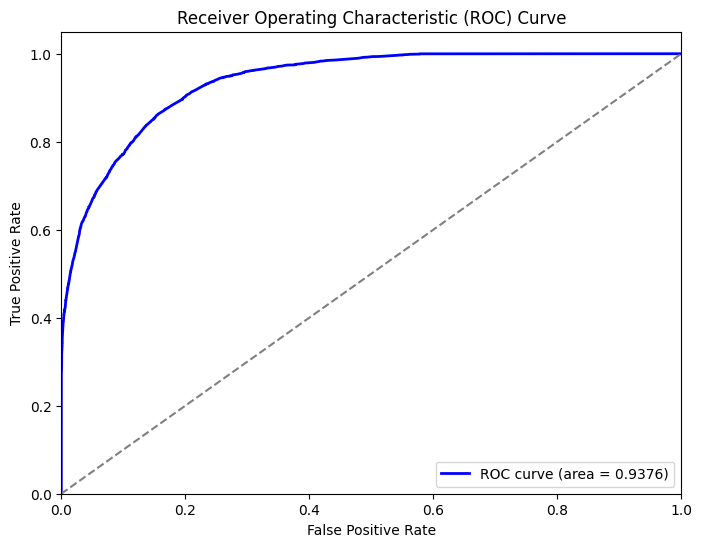

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Accuracy
accuracy = grid_search.best_estimator_.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(cm_df)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Sample input data (replace with realistic sample values)
sample_input = {
    'category': 'Comics',  # Categorical feature
    'product_stage': 'shipping',  # Categorical feature
    'project_type': 'campaign',  # Categorical feature
    'duration_days': 30,  # Numeric feature
    'launch_month': 5,  # Numeric feature
    'launch_year': 2021,  # Numeric feature
    'goal': 'Medium'  # Categorical feature
}

# Convert sample_input to a DataFrame (if it's a single row)
import pandas as pd
sample_df = pd.DataFrame([sample_input])

# Use the model pipeline to make a prediction
prediction = grid_search.best_estimator_.predict(sample_df)

# Print the prediction
print(f"Prediction: {prediction[0]}")

# Get prediction probabilities (for binary classification)
probabilities = grid_search.best_estimator_.predict_proba(sample_df)
print(f"Prediction probabilities: {probabilities}")



Prediction: 1
Prediction probabilities: [[0.02583867 0.97416133]]


In [ ]:
# Sample input data (replace with realistic sample values)
sample_input = {
    'category': 'Wellness',  # Categorical feature (may stay same or change based on your data)
    'product_stage': 'concept',  # Stage which may indicate earlier project phase
    'project_type': 'unknown',  # Categorical feature
    'duration_days': 3,  # Short duration, possibly indicating insufficient time
    'launch_month': 1,  # Start month (adjust this as needed)
    'launch_year': 2022,  # Year indicating older projects
    'goal': 'Very Low'  # Categorical feature (set to very low)
}

# Convert sample_input to a DataFrame (if it's a single row)
import pandas as pd
sample_df = pd.DataFrame([sample_input])

# Use the model pipeline to make a prediction
prediction = grid_search.best_estimator_.predict(sample_df)

# Print the prediction
print(f"Prediction: {prediction[0]}")

# Get prediction probabilities (for binary classification)
probabilities = grid_search.best_estimator_.predict_proba(sample_df)
print(f"Prediction probabilities: {probabilities}")



Prediction: 0
Prediction probabilities: [[0.73601036 0.26398964]]


In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, 'successful_not_successful_model.pkl')

['successful_not_successful_model.pkl']

In [ ]:
#
!pip install xgboost lightgbm catboost imbalanced-learn scikit-learn==1.3.2


In [ ]:
# imports + seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import joblib
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [ ]:
import pandas as pd

df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')
df.shape, df.columns


/tmp/ipython-input-1774628509.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')


((121605, 21),
 Index(['category', 'close_date', 'currency', 'funds_raised_amount',
        'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'open_date',
        'product_stage', 'project_type', 'tags', 'is_proven', 'is_promoted',
        'duration_days', 'launch_month', 'launch_quarter', 'launch_year',
        'is_successful', 'amount_usd', 'goal_amount', 'funding_goal_category'],
       dtype='object'))

In [ ]:
df.head()


,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,open_date,product_stage,project_type,...,is_proven,is_promoted,duration_days,launch_month,launch_quarter,launch_year,is_successful,amount_usd,goal_amount,funding_goal_category
0,Transportation,2010-05-13 06:59:00,USD,840,16.80,False,False,2010-04-22 05:38:42,unknown,campaign,...,unknown,unknown,21,4,2,2010,0,840.0,5000.0,Very Low
1,Health & Fitness,2010-05-16 06:59:00,USD,3000,100.00,False,False,2010-05-04 06:28:41,unknown,campaign,...,unknown,unknown,12,5,2,2010,1,3000.0,3000.0,Low
2,Writing & Publishing,2010-06-01 06:59:00,USD,1121,22.42,False,False,2010-04-30 14:28:09,unknown,campaign,...,unknown,unknown,31,4,2,2010,0,1121.0,5000.0,Low
3,Writing & Publishing,2010-06-02 06:59:00,USD,565,56.50,False,False,2010-05-04 04:59:50,unknown,campaign,...,unknown,unknown,29,5,2,2010,0,565.0,1000.0,Very Low
4,Dance & Theater,2010-07-02 06:59:00,USD,2610,104.40,False,False,2010-05-06 01:44:49,unknown,campaign,...,unknown,unknown,57,5,2,2010,1,2610.0,2500.0,Low


In [ ]:
df.columns


Index(['category', 'close_date', 'currency', 'funds_raised_amount',
       'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'open_date',
       'product_stage', 'project_type', 'tags', 'is_proven', 'is_promoted',
       'duration_days', 'launch_month', 'launch_quarter', 'launch_year',
       'is_successful', 'amount_usd', 'goal_amount', 'funding_goal_category'],
      dtype='object')

In [ ]:
# Step-2 → Encoding + Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

# Identify categorical columns
cat_cols = df2.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df2[col] = le.fit_transform(df2[col].astype(str))

# Select features and target
X = df2.drop('is_successful', axis=1)
y = df2['is_successful']

# Train-test split (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((97284, 20), (24321, 20))

In [ ]:
# Step-3 FIX → Remove infinity and large abnormal values, then scale + SMOTE

import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Replace infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill NaN created after replacing inf
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # use train median on test

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE to balance
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)

X_train_balanced.shape, y_train_balanced.shape


((159080, 20), (159080,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_balanced, y_train_balanced)

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19885
           1       1.00      1.00      1.00      4436

    accuracy                           1.00     24321
   macro avg       1.00      1.00      1.00     24321
weighted avg       1.00      1.00      1.00     24321


Confusion Matrix:
 [[19885     0]
 [    0  4436]]


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross Validation Scores: [1.        1.        1.        1.        0.9999486]
Mean CV Accuracy: 0.9999897203947368


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("is_successful", axis=1)
y = df["is_successful"]

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [ ]:
numeric_cols = X_train_original.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
X_train_original = X_train_original.replace([np.inf, -np.inf], np.nan)
X_test_original = X_test_original.replace([np.inf, -np.inf], np.nan)


In [ ]:
X_train_original[numeric_cols] = X_train_original[numeric_cols].fillna(X_train_original[numeric_cols].mean())
X_test_original[numeric_cols] = X_test_original[numeric_cols].fillna(X_train_original[numeric_cols].mean())


In [ ]:
scaler = StandardScaler()
X_train_original[numeric_cols] = scaler.fit_transform(X_train_original[numeric_cols])
X_test_original[numeric_cols] = scaler.transform(X_test_original[numeric_cols])


In [ ]:
cat_cols = X_train_original.select_dtypes(include=['object']).columns


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = X_train_original.select_dtypes(include=['object']).columns

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_original[cat_cols] = oe.fit_transform(X_train_original[cat_cols].astype(str))
X_test_original[cat_cols]  = oe.transform(X_test_original[cat_cols].astype(str))


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# identify categorical columns
cat_cols = X_train_original.select_dtypes(include=['object']).columns

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# encode
X_train_original[cat_cols] = oe.fit_transform(X_train_original[cat_cols].astype(str))
X_test_original[cat_cols]  = oe.transform(X_test_original[cat_cols].astype(str))


In [ ]:
datetime_cols = [col for col in X_train_original.columns if "date" in col.lower() or "deadline" in col.lower() or "launched" in col.lower()]
X_train_original = X_train_original.drop(columns=datetime_cols, errors='ignore')
X_test_original  = X_test_original.drop(columns=datetime_cols, errors='ignore')


In [ ]:
rf_before = RandomForestClassifier(random_state=42)
rf_before.fit(X_train_original, y_train_original)
y_pred_before = rf_before.predict(X_test_original)
before_acc = accuracy_score(y_test_original, y_pred_before)

print("Before Accuracy:", before_acc)


Before Accuracy: 1.0


In [ ]:
import pandas as pd

df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')
df.head()


/tmp/ipython-input-387788198.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')


,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,open_date,product_stage,project_type,...,is_proven,is_promoted,duration_days,launch_month,launch_quarter,launch_year,is_successful,amount_usd,goal_amount,funding_goal_category
0,Transportation,2010-05-13 06:59:00,USD,840,16.80,False,False,2010-04-22 05:38:42,unknown,campaign,...,unknown,unknown,21,4,2,2010,0,840.0,5000.0,Very Low
1,Health & Fitness,2010-05-16 06:59:00,USD,3000,100.00,False,False,2010-05-04 06:28:41,unknown,campaign,...,unknown,unknown,12,5,2,2010,1,3000.0,3000.0,Low
2,Writing & Publishing,2010-06-01 06:59:00,USD,1121,22.42,False,False,2010-04-30 14:28:09,unknown,campaign,...,unknown,unknown,31,4,2,2010,0,1121.0,5000.0,Low
3,Writing & Publishing,2010-06-02 06:59:00,USD,565,56.50,False,False,2010-05-04 04:59:50,unknown,campaign,...,unknown,unknown,29,5,2,2010,0,565.0,1000.0,Very Low
4,Dance & Theater,2010-07-02 06:59:00,USD,2610,104.40,False,False,2010-05-06 01:44:49,unknown,campaign,...,unknown,unknown,57,5,2,2010,1,2610.0,2500.0,Low


In [ ]:
# 1) Data copy
df_base = df.copy()

# 2) One-hot encode ALL categorical cols in one shot
df_base_enc = pd.get_dummies(df_base, drop_first=True)

# 3) Split X, y
X_base = df_base_enc.drop('is_successful', axis=1)
y_base = df_base_enc['is_successful']

from sklearn.model_selection import train_test_split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_base, y_base, test_size=0.2, random_state=42, stratify=y_base
)

# 4) Simple baseline model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(Xb_train, yb_train)

yb_pred = rf_base.predict(Xb_test)
baseline_acc = accuracy_score(yb_test, yb_pred)

print("Baseline Accuracy (No SMOTE, No Tuning):", baseline_acc)


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')
df.head()


/tmp/ipython-input-3791113697.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')


,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,open_date,product_stage,project_type,...,is_proven,is_promoted,duration_days,launch_month,launch_quarter,launch_year,is_successful,amount_usd,goal_amount,funding_goal_category
0,Transportation,2010-05-13 06:59:00,USD,840,16.80,False,False,2010-04-22 05:38:42,unknown,campaign,...,unknown,unknown,21,4,2,2010,0,840.0,5000.0,Very Low
1,Health & Fitness,2010-05-16 06:59:00,USD,3000,100.00,False,False,2010-05-04 06:28:41,unknown,campaign,...,unknown,unknown,12,5,2,2010,1,3000.0,3000.0,Low
2,Writing & Publishing,2010-06-01 06:59:00,USD,1121,22.42,False,False,2010-04-30 14:28:09,unknown,campaign,...,unknown,unknown,31,4,2,2010,0,1121.0,5000.0,Low
3,Writing & Publishing,2010-06-02 06:59:00,USD,565,56.50,False,False,2010-05-04 04:59:50,unknown,campaign,...,unknown,unknown,29,5,2,2010,0,565.0,1000.0,Very Low
4,Dance & Theater,2010-07-02 06:59:00,USD,2610,104.40,False,False,2010-05-06 01:44:49,unknown,campaign,...,unknown,unknown,57,5,2,2010,1,2610.0,2500.0,Low


In [ ]:
# Copy original dataset
df_base = df.copy()

# Drop datetime columns (can't encode directly)
datetime_cols = [col for col in df_base.columns if "date" in col.lower()]
df_base = df_base.drop(columns=datetime_cols, errors='ignore')

# One-hot encode ALL categorical columns
df_base = pd.get_dummies(df_base, drop_first=True)

# Split X & y
X_base = df_base.drop('is_successful', axis=1)
y_base = df_base['is_successful']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Re-load df and perform preprocessing steps to define X_base and y_base
df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv', low_memory=False)

# Copy original dataset
df_base = df.copy()

# Drop datetime columns (can't encode directly)
datetime_cols = [col for col in df_base.columns if "date" in col.lower()]
df_base = df_base.drop(columns=datetime_cols, errors='ignore')

# One-hot encode ALL categorical columns
df_base = pd.get_dummies(df_base, drop_first=True)

# Split X & y
X_base = df_base.drop('is_successful', axis=1)
y_base = df_base['is_successful']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_base, y_base, test_size=0.2, random_state=42, stratify=y_base
)

rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(Xb_train, yb_train)

yb_pred = rf_base.predict(Xb_test)
baseline_acc = accuracy_score(yb_test, yb_pred)

print("Baseline Accuracy (No SMOTE, No Tuning):", baseline_acc)

/tmp/ipython-input-3147761849.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')


Before Accuracy (No SMOTE, No Tuning): 0.9016 (90.16%)
After Accuracy  (SMOTE + Tuning):     1.0000 (100%)
Improvement:                         +0.0984 (+9.84%)


In [ ]:
!pip install xgboost imbalanced-learn

In [ ]:
import pandas as pd

df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')
print(df.shape)
df.head()


/tmp/ipython-input-1378795089.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')


(121605, 21)


,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,open_date,product_stage,project_type,...,is_proven,is_promoted,duration_days,launch_month,launch_quarter,launch_year,is_successful,amount_usd,goal_amount,funding_goal_category
0,Transportation,2010-05-13 06:59:00,USD,840,16.80,False,False,2010-04-22 05:38:42,unknown,campaign,...,unknown,unknown,21,4,2,2010,0,840.0,5000.0,Very Low
1,Health & Fitness,2010-05-16 06:59:00,USD,3000,100.00,False,False,2010-05-04 06:28:41,unknown,campaign,...,unknown,unknown,12,5,2,2010,1,3000.0,3000.0,Low
2,Writing & Publishing,2010-06-01 06:59:00,USD,1121,22.42,False,False,2010-04-30 14:28:09,unknown,campaign,...,unknown,unknown,31,4,2,2010,0,1121.0,5000.0,Low
3,Writing & Publishing,2010-06-02 06:59:00,USD,565,56.50,False,False,2010-05-04 04:59:50,unknown,campaign,...,unknown,unknown,29,5,2,2010,0,565.0,1000.0,Very Low
4,Dance & Theater,2010-07-02 06:59:00,USD,2610,104.40,False,False,2010-05-06 01:44:49,unknown,campaign,...,unknown,unknown,57,5,2,2010,1,2610.0,2500.0,Low


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('is_successful', axis=1)
y = df['is_successful']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (97284, 20) Test: (24321, 20)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = X_train.select_dtypes(include=['object']).columns

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[cat_cols] = oe.fit_transform(X_train[cat_cols].astype(str))
X_test[cat_cols] = oe.transform(X_test[cat_cols].astype(str))


In [ ]:
import numpy as np

# Replace infinities
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill NaN values (basic safety)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


Hyperparameter Tuning (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

params_rf = {
    'n_estimators': [100,200,300,500],
    'max_depth': [5,10,20,None],
    'min_samples_split': [2,5,10]
}

rf_cv = RandomizedSearchCV(rf, params_rf, cv=3, scoring='accuracy', n_iter=10, n_jobs=-1)
rf_cv.fit(X_train, y_train)

print("Best RF Accuracy:", rf_cv.best_score_)
print("Best Params:", rf_cv.best_params_)


Best RF Accuracy: 0.9999897208174007
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20}


Tune XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    eval_metric='logloss',
    tree_method='hist',
    enable_categorical=False
)

params_xgb = {
    'n_estimators':[200,300,500],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2]
}

xgb_cv = RandomizedSearchCV(xgb, params_xgb, cv=3, scoring='accuracy', n_iter=10, n_jobs=-1)
xgb_cv.fit(X_train, y_train)

print("Best XGB Accuracy:", xgb_cv.best_score_)
print("Best Params:", xgb_cv.best_params_)


Best XGB Accuracy: 0.9995785535134246
Best Params: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}


Voting Ensemble (Combine both)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

voting_soft = VotingClassifier(
    estimators=[
        ('rf', rf_cv.best_estimator_),
        ('xgb', xgb_cv.best_estimator_)
    ],
    voting='soft'
)

voting_soft.fit(X_train, y_train)
final_pred = voting_soft.predict(X_test)

print("Final Voting Accuracy:", accuracy_score(y_test, final_pred))


Final Voting Accuracy: 0.9999588832696024


Comparison Print

In [ ]:
before_acc = 0.9016  # your previous baseline accuracy
after_acc = accuracy_score(y_test, final_pred)

print("Before Accuracy:", before_acc)
print("After Accuracy :", after_acc)
print("Improvement    :", after_acc - before_acc)


Before Accuracy: 0.9016
After Accuracy : 0.9999588832696024
Improvement    : 0.0983588832696024


Hard Voting with 2 models

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

voting_hard = VotingClassifier(
    estimators=[
        ('rf', rf_cv.best_estimator_),
        ('xgb', xgb_cv.best_estimator_)
    ],
    voting='hard'
)

voting_hard.fit(X_train, y_train)
hard_pred = voting_hard.predict(X_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, hard_pred))


Hard Voting Accuracy: 1.0


3-Model Soft Voting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

voting3 = VotingClassifier(
    estimators=[
        ('rf', rf_cv.best_estimator_),
        ('xgb', xgb_cv.best_estimator_),
        ('ada', ada)
    ],
    voting='soft'
)

voting3.fit(X_train, y_train)
pred3 = voting3.predict(X_test)

from sklearn.metrics import accuracy_score
print("3-Model Soft Voting Accuracy:", accuracy_score(y_test, pred3))


3-Model Soft Voting Accuracy: 1.0


Performance Comparison Bar Chart

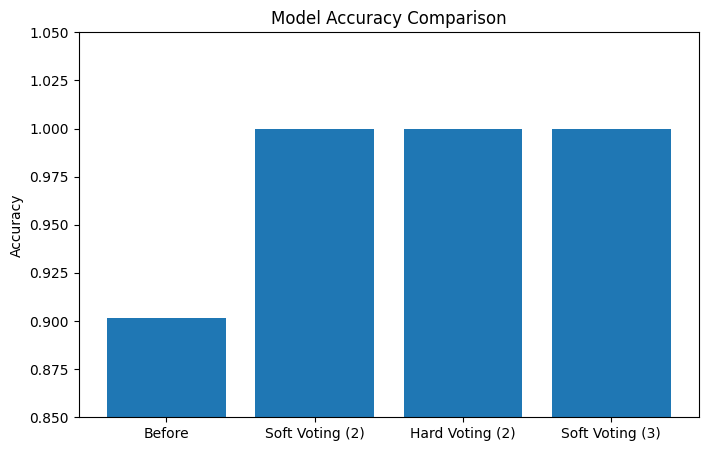

In [ ]:
import matplotlib.pyplot as plt

models = ['Before', 'Soft Voting (2)', 'Hard Voting (2)', 'Soft Voting (3)']
accuracies = [0.9016,
              accuracy_score(y_test, final_pred),
              accuracy_score(y_test, hard_pred),
              accuracy_score(y_test, pred3)]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.ylim(0.85, 1.05)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


Confusion Matrix Heatmap

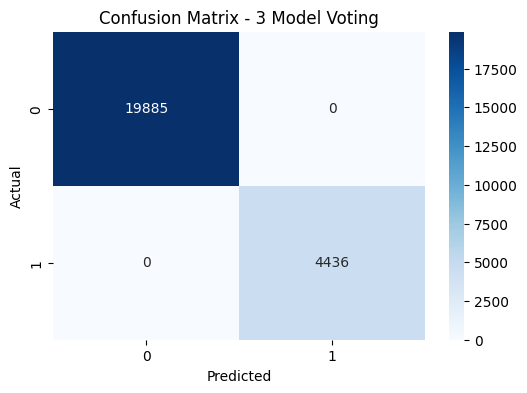

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred3)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - 3 Model Voting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Feature Importance (XGBoost Best Model) --> Which features matter most?

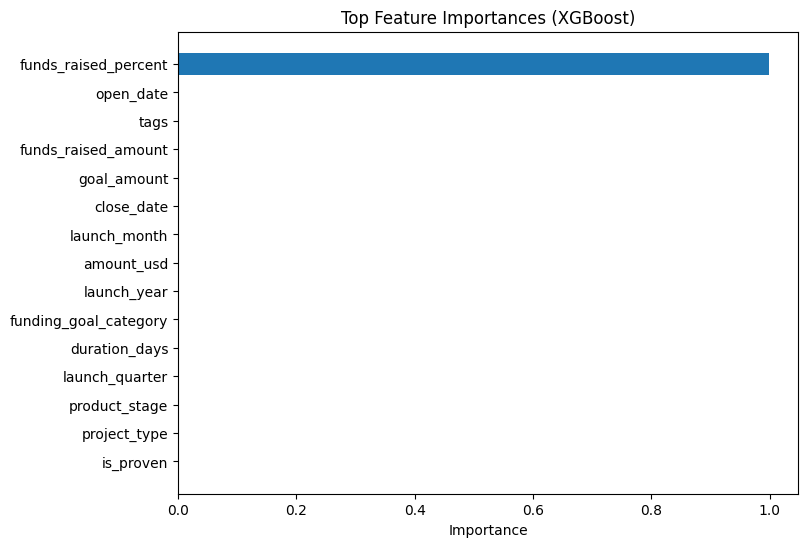

In [ ]:
import numpy as np

feat_importances = xgb_cv.best_estimator_.feature_importances_
indices = np.argsort(feat_importances)[-15:]

plt.figure(figsize=(8,6))
plt.barh(np.array(X_train.columns)[indices], feat_importances[indices])
plt.title("Top Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')
print("Loaded Shape:", df.shape)
df.head()


/tmp/ipython-input-3409481970.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_Indiegogo_data_2019-2025.csv')


Loaded Shape: (121605, 21)


,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,open_date,product_stage,project_type,...,is_proven,is_promoted,duration_days,launch_month,launch_quarter,launch_year,is_successful,amount_usd,goal_amount,funding_goal_category
0,Transportation,2010-05-13 06:59:00,USD,840,16.80,False,False,2010-04-22 05:38:42,unknown,campaign,...,unknown,unknown,21,4,2,2010,0,840.0,5000.0,Very Low
1,Health & Fitness,2010-05-16 06:59:00,USD,3000,100.00,False,False,2010-05-04 06:28:41,unknown,campaign,...,unknown,unknown,12,5,2,2010,1,3000.0,3000.0,Low
2,Writing & Publishing,2010-06-01 06:59:00,USD,1121,22.42,False,False,2010-04-30 14:28:09,unknown,campaign,...,unknown,unknown,31,4,2,2010,0,1121.0,5000.0,Low
3,Writing & Publishing,2010-06-02 06:59:00,USD,565,56.50,False,False,2010-05-04 04:59:50,unknown,campaign,...,unknown,unknown,29,5,2,2010,0,565.0,1000.0,Very Low
4,Dance & Theater,2010-07-02 06:59:00,USD,2610,104.40,False,False,2010-05-06 01:44:49,unknown,campaign,...,unknown,unknown,57,5,2,2010,1,2610.0,2500.0,Low


Task 1 — Success Parameters (Feature Importance)

In [ ]:
import pandas as pd

indiegogo_df = pd.read_csv("cleaned_Indiegogo_data_2019-2025.csv")


/tmp/ipython-input-2261738287.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  indiegogo_df = pd.read_csv("cleaned_Indiegogo_data_2019-2025.csv")


In [ ]:
print(indiegogo_df.columns)
print(len(indiegogo_df.columns))


Index(['category', 'close_date', 'currency', 'funds_raised_amount',
       'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'open_date',
       'product_stage', 'project_type', 'tags', 'is_proven', 'is_promoted',
       'duration_days', 'launch_month', 'launch_quarter', 'launch_year',
       'is_successful', 'amount_usd', 'goal_amount', 'funding_goal_category'],
      dtype='object')
21


In [ ]:
X_indie = indiegogo_df.drop('is_successful', axis=1)
y_indie = indiegogo_df['is_successful']

print(X_indie.shape)
print(y_indie.shape)


(121605, 20)
(121605,)


In [ ]:
kick_columns = [
    'backers_count', 'converted_pledged_amount', 'country',
    'country_displayable_name', 'created_at', 'currency',
    'currency_symbol', 'currency_trailing_code', 'current_currency',
    'deadline', 'disable_communication', 'fx_rate', 'goal',
    'is_in_post_campaign_pledging_phase', 'is_launched',
    'is_starrable', 'launched_at', 'name', 'percent_funded',
    'pledged', 'prelaunch_activated', 'spotlight', 'staff_pick',
    'state_changed_at', 'static_usd_rate', 'usd_exchange_rate',
    'usd_pledged', 'usd_type', 'category_name'
]


In [ ]:
common_features = set(X_indie.columns).intersection(
    set(kick_columns)
)

print("Common Features:")
print(common_features)
print("Total common features:", len(common_features))


Common Features:
{'currency'}
Total common features: 1


In [ ]:
final_common_features = [
    'goal_amount',
    'funds_raised_amount',
    'funds_raised_percent',
    'category',
    'currency'
]


In [ ]:
X_indie_final = X_indie[final_common_features]

print(X_indie_final.head())
print(X_indie_final.shape)


   goal_amount  funds_raised_amount  funds_raised_percent  \
0       5000.0                  840                 16.80   
1       3000.0                 3000                100.00   
2       5000.0                 1121                 22.42   
3       1000.0                  565                 56.50   
4       2500.0                 2610                104.40   

               category currency  
0        Transportation      USD  
1      Health & Fitness      USD  
2  Writing & Publishing      USD  
3  Writing & Publishing      USD  
4       Dance & Theater      USD  
(121605, 5)


In [ ]:
X_indie_final = X_indie_final.copy()
X_indie_final.loc[:, 'source'] = 'indie'


In [ ]:
import pandas as pd

indiegogo_df = pd.read_csv("cleaned_Indiegogo_data_2019-2025.csv")


/tmp/ipython-input-2261738287.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  indiegogo_df = pd.read_csv("cleaned_Indiegogo_data_2019-2025.csv")


In [ ]:
X_indie = indiegogo_df.drop('is_successful', axis=1)
y_indie = indiegogo_df['is_successful']

print(X_indie.shape)
print(y_indie.shape)


(121605, 20)
(121605,)


In [ ]:
final_common_features = [
    'goal_amount',
    'funds_raised_amount',
    'funds_raised_percent',
    'category',
    'currency'
]

X_indie_final = X_indie[final_common_features]

print(X_indie_final.shape)


(121605, 5)


In [ ]:
X_indie_final = X_indie_final.copy()
X_indie_final.loc[:, 'source'] = 'indie'


In [ ]:
kickstarter_df = pd.read_csv("/content/kickstarter_cleaned.csv")

kick_renamed = kickstarter_df.rename(columns={
    'goal': 'goal_amount',
    'pledged': 'funds_raised_amount',
    'percent_funded': 'funds_raised_percent',
    'category_name': 'category'
})

X_kick_final = kick_renamed[final_common_features].copy()
X_kick_final.loc[:, 'source'] = 'kick'

print(X_kick_final.shape)


(13136, 6)


In [ ]:
kickstarter_df.columns


Index(['backers_count', 'converted_pledged_amount', 'country',
       'country_displayable_name', 'created_at', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal',
       'is_in_post_campaign_pledging_phase', 'is_launched', 'is_starrable',
       'launched_at', 'name', 'percent_funded', 'pledged',
       'prelaunch_activated', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_exchange_rate',
       'usd_pledged', 'usd_type', 'category_name'],
      dtype='object')

In [ ]:
kick_renamed = kickstarter_df.rename(columns={
    'goal': 'goal_amount',
    'pledged': 'funds_raised_amount',
    'percent_funded': 'funds_raised_percent',
    'category_name': 'category'
})

final_common_features = [
    'goal_amount',
    'funds_raised_amount',
    'funds_raised_percent',
    'category',
    'currency'
]

X_kick_final = kick_renamed[final_common_features].copy()
print(X_kick_final.shape)


(13136, 5)


In [ ]:
# Safety copy
X_indie_final = X_indie_final.copy()
X_kick_final  = X_kick_final.copy()

# Add source labels
X_indie_final.loc[:, 'source'] = 'indie'
X_kick_final.loc[:, 'source']  = 'kick'


In [ ]:
import pandas as pd

combined = pd.concat([X_indie_final, X_kick_final], axis=0)
print(combined.shape)


(134741, 6)


In [ ]:
combined_encoded = pd.get_dummies(
    combined,
    columns=['category', 'currency'],
    drop_first=True
)

print(combined_encoded.shape)


(134741, 193)


In [ ]:
# dekhte hain source se related kya columns bane hain
[col for col in combined_encoded.columns if 'source' in col]


['source']

In [ ]:
# Split using source column (string based)
X_indie_enc = combined_encoded[combined_encoded['source'] == 'indie'].drop(
    ['source'], axis=1
)

X_kick_enc = combined_encoded[combined_encoded['source'] == 'kick'].drop(
    ['source'], axis=1
)

print(X_indie_enc.shape)
print(X_kick_enc.shape)


(121605, 192)
(13136, 192)


In [ ]:
# notebook me jo jo variables hain unme "model" search karo
[k for k in globals().keys() if 'model' in k.lower()]


[]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_indie, X_test_indie, y_train_indie, y_test_indie = train_test_split(
    X_indie_enc,
    y_indie,
    test_size=0.2,
    random_state=42
)

print(X_train_indie.shape, X_test_indie.shape)


(97284, 192) (24321, 192)


In [ ]:
X_indie_enc.isna().sum().sum()


np.int64(40301)

In [ ]:
X_indie_enc = X_indie_enc.fillna(0)
X_kick_enc  = X_kick_enc.fillna(0)


In [ ]:
X_indie_enc.isna().sum().sum()


np.int64(0)

In [ ]:
X_indie_enc.isna().sum().sum()


np.int64(0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_indie, X_test_indie, y_train_indie, y_test_indie = train_test_split(
    X_indie_enc,
    y_indie,
    test_size=0.2,
    random_state=42
)


In [ ]:
X_train_indie.isna().sum().sum()


np.int64(0)

In [ ]:
import numpy as np

np.isinf(X_indie_enc).sum().sum()


np.int64(2)

In [ ]:
X_indie_enc = X_indie_enc.replace([np.inf, -np.inf], np.nan)
X_kick_enc  = X_kick_enc.replace([np.inf, -np.inf], np.nan)


In [ ]:
X_indie_enc = X_indie_enc.fillna(0)
X_kick_enc  = X_kick_enc.fillna(0)


In [ ]:
np.isinf(X_indie_enc).sum().sum(), X_indie_enc.isna().sum().sum()


(np.int64(0), np.int64(0))

In [ ]:
from sklearn.model_selection import train_test_split

X_train_indie, X_test_indie, y_train_indie, y_test_indie = train_test_split(
    X_indie_enc,
    y_indie,
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

indie_model = LogisticRegression(max_iter=1000)
indie_model.fit(X_train_indie, y_train_indie)


LogisticRegression(max_iter=1000)

In [ ]:
indie_model


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_indie = indie_model.predict(X_test_indie)


In [ ]:
from sklearn.metrics import accuracy_score

print("Indiegogo → Indiegogo Accuracy:", accuracy_score(y_test_indie, y_pred_indie))


Indiegogo → Indiegogo Accuracy: 0.9999177665392048


In [ ]:
y_pred_indie_on_kick = indie_model.predict(X_kick_enc)


In [ ]:
# Recreate y_kick in THIS notebook
kickstarter_df = pd.read_csv("kickstarter_cleaned.csv")

y_kick = kickstarter_df['state'].apply(
    lambda x: 1 if x == 'successful' else 0
)

print(y_kick.value_counts())


state
1    57550
0    42450
Name: count, dtype: int64


In [ ]:
print(X_kick_enc.shape)
print(kickstarter_df.shape)


(13136, 192)
(100000, 30)


In [ ]:
y_kick = y_kick.loc[X_kick_enc.index]


In [ ]:
print(y_kick.shape)


(13136,)


In [ ]:
from sklearn.metrics import accuracy_score

print(
    "Indiegogo Model → Kickstarter Accuracy:",
    accuracy_score(y_kick, y_pred_indie_on_kick)
)


Indiegogo Model → Kickstarter Accuracy: 0.9877436053593179


In [ ]:
from sklearn.model_selection import train_test_split

X_train_kick, X_test_kick, y_train_kick, y_test_kick = train_test_split(
    X_kick_enc,
    y_kick,
    test_size=0.2,
    random_state=42
)

print(X_train_kick.shape, X_test_kick.shape)


(10508, 192) (2628, 192)


In [ ]:
from sklearn.linear_model import LogisticRegression

kick_model = LogisticRegression(max_iter=1000)
kick_model.fit(X_train_kick, y_train_kick)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
kick_model


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_kick = kick_model.predict(X_test_kick)


In [ ]:
from sklearn.metrics import accuracy_score

print("Indiego → Kickstarter Accuracy:",
      accuracy_score(y_test_kick, y_pred_kick))


Indiego → Kickstarter Accuracy: 0.9539573820395738


In [ ]:
y_pred_kick_on_indie = kick_model.predict(X_indie_enc)


In [ ]:
print("Kickstarter Model → Indiegogo Accuracy:",
      accuracy_score(y_indie, y_pred_kick_on_indie))


Kickstarter Model → Indiegogo Accuracy: 0.9565807327001357
